In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pylab as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from IPython.core.display import display, HTML

In [2]:
warnings.filterwarnings('ignore')
display(HTML("<style> .output_area { text-align: center; }</style>"))
sns.set(context='notebook' ,style="whitegrid", font='consolas')
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)
np.set_printoptions(suppress=True)

In [3]:
df = pd.read_csv('st_ts.txt',index_col='id')
df.columns = pd.to_datetime(df.columns)
df.head(2)

2017-08-28  2017-09-04  2017-09-11  2017-09-18  2017-09-25  2017-10-02  2017-10-09  2017-10-16  2017-10-23  2017-10-30  2017-11-06  2017-11-13  2017-11-20  2017-11-27  2017-12-04  2017-12-11  2017-12-18  2017-12-25  2018-01-01  2018-01-08  2018-01-15  2018-01-22  2018-01-29  2018-02-05  2018-02-12  2018-02-19  2018-02-26  2018-03-05  2018-03-12  2018-03-19  2018-03-26  2018-04-02  2018-04-09  2018-04-16  2018-04-23  2018-04-30  2018-05-07  2018-05-14  2018-05-21  2018-05-28  2018-06-04  2018-06-11  2018-06-18  2018-06-25  2018-07-02  2018-07-09  2018-07-16  2018-07-23  2018-07-30  2018-08-06  2018-08-13  2018-08-20  2018-08-27  2018-09-03  2018-09-10  2018-09-17  2018-09-24  2018-10-01  2018-10-08  2018-10-15  2018-10-22  2018-10-29  2018-11-05  2018-11-12  2018-11-19  2018-11-26  2018-12-03  2018-12-10  2018-12-17  2018-12-24  2018-12-31  2019-01-07  2019-01-14  2019-01-21  2019-01-28  2019-02-04  2019-02-11  2019-02-18  2019-02-25  2019-03-04  2019-03-11  2019-03-18  \
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
0            2           3           0           0           2           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           1           0           0           1           1           0           0           1           0           0           0          15           8           2           2           1           2           2           1           0           0           0           0           0           0           0           2           0           0           0           0           0           0           0           0           0           0           0           0           0   
1            3           2           0           1           0           0           2           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           1           0           0           0           0           0           1           0           0           0           0           0           0           0           3           0           1           0           0           0           0           0           0           0           0           0           2           0           0           0           0           1           0           0           0   

    2019-03-25  2019-04-01  2019-04-08  201

In [4]:
df_t = df.T
df_t.index = pd.to_datetime(df_t.index)
df_t.head(2)

id          0             1             2             3             4             5             6             7             8             9             10            11            12            13            14            15            16            17            18            19            20            21            22            23            24            25            26            27            28            29            30            31            32            33            34            35            36            37            38            39            40            41            42            43            44            45            46            47            48            49            50            51            52            53            54            55            56            57            58            59            60            61            62            63            64            65            66            67            68            69            \
2017-08-28             2             3             0             0             1             0             0             0             1             0             0             1             1             0             2             0             0             2             0             2             1             1             1             1             0             8             0             0             0             2             0             0             1             0             0             2             0             1             0             0             0             1             2             0             1             0             0            30             0             0             0             5             6            16             2             2             0             0             2             0             0             0             0             0             2             3             3             4             2             0   
2017-09-04             3             2             0             5             1             0             0             4             1             0             0            23             3             2             6             0             0             2             0             4             1             0             0             3             1             8             1             4             0             0             0             0             4             1             1             2             0             1             1             0             0             1             0             0             4             1             7            42             2             4             0             8             7             8             7             5             0             0             2             0             2             1             0             0             2             2             4             2             8             2   

id          70            71            72            73            74            75            76            77            78            79            80            81            82            83            84            85            86            87            88            89            90            91            92            93            94            95            96            97            98            99            100           101           102           103           104           105           106           107           108           109           110           111           112           113           114           115           116           117           118           119           120           121           122           123           124           125           126           127           128           129           130           131           132           133           134           135           136           137           138           139           \
2017-08-28             

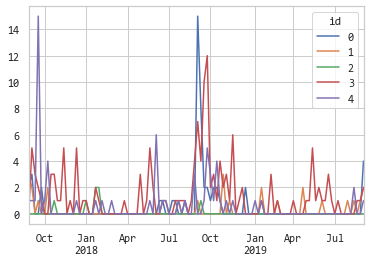

In [5]:
df_t.iloc[:, 0:5].plot()
plt.show()

In [6]:
##### Clustering without any data transform

0    56697
1     1648
2       79
dtype: int64


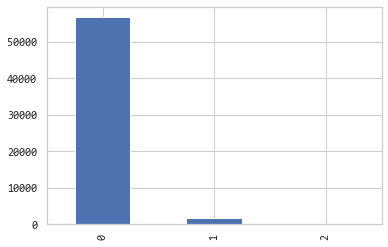

In [7]:
clusters = KMeans(n_clusters=3, random_state=0).fit_predict(df, )
print(pd.Series(clusters).value_counts())
pd.Series(clusters).value_counts().plot.bar()
plt.show()

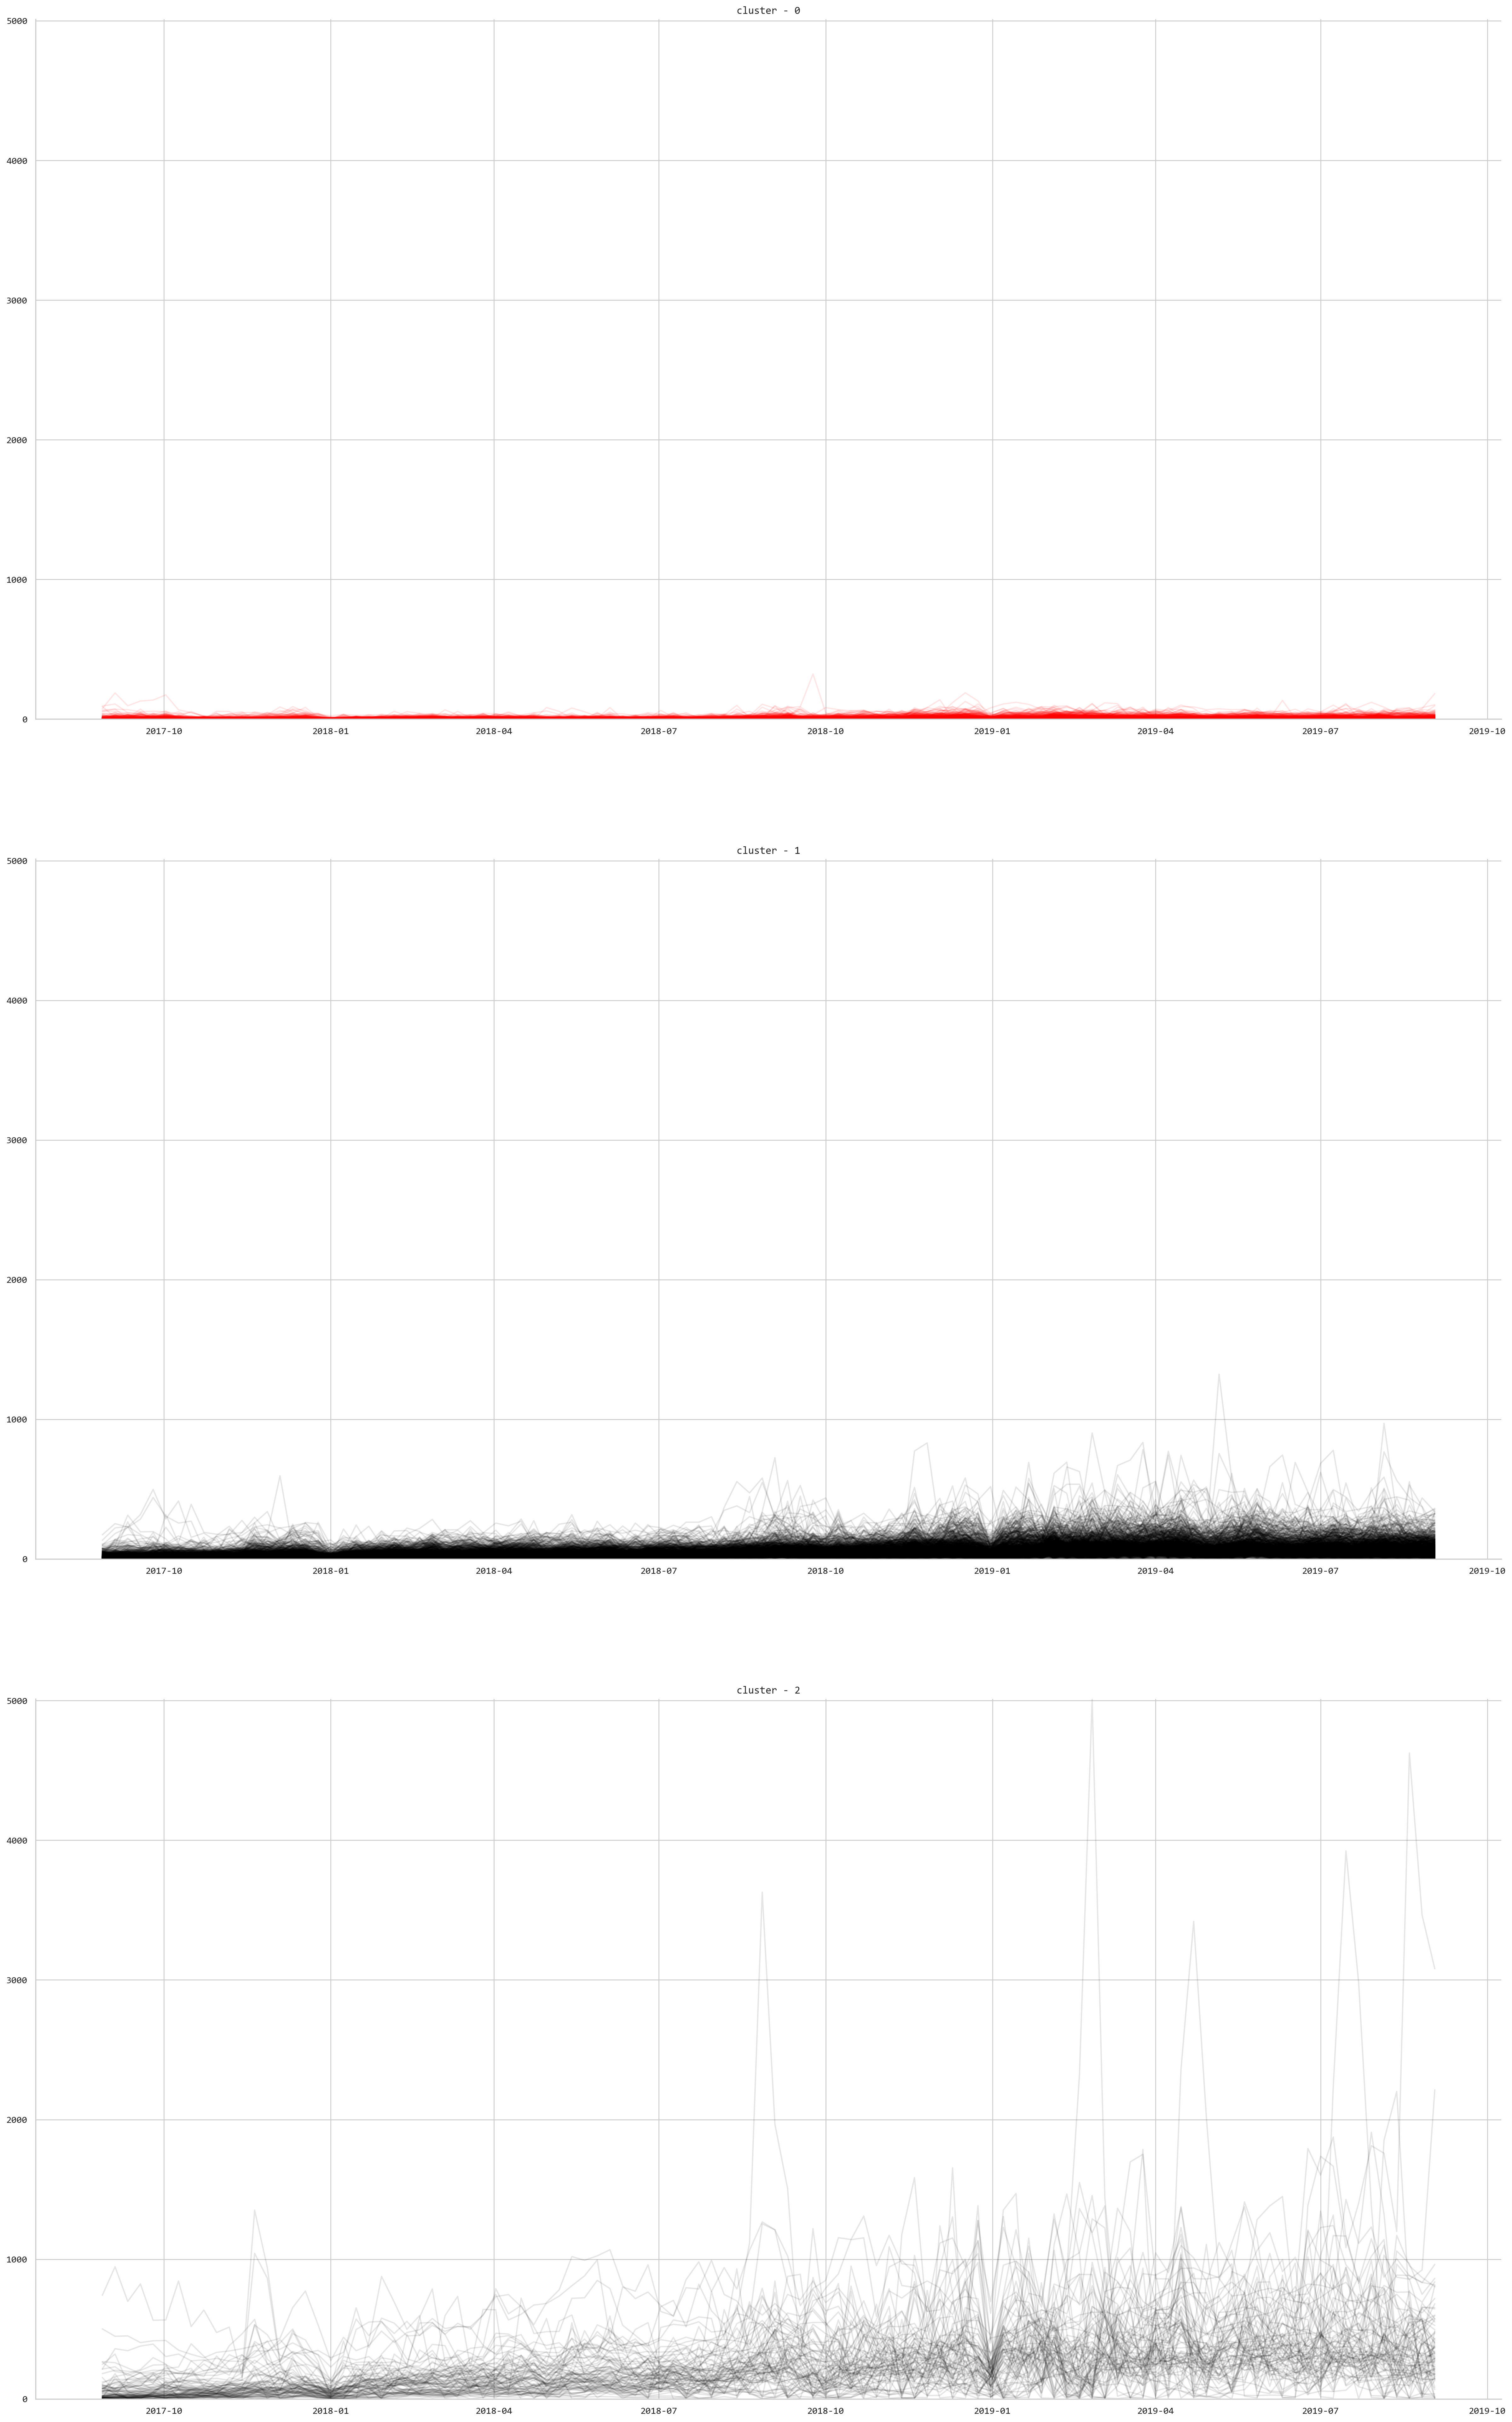

In [8]:
plt.figure(figsize=[30, 50], dpi=200)

max_y = np.max(df.max())

plt.subplot(3, 1, 1)
plt.title('cluster - 0')
plt.ylim([0, max_y])
inds = np.where(clusters == 0)[0][:1000]
for i in inds:
    plt.plot(df_t.iloc[:, i], c='red', alpha=0.1)
    
plt.subplot(3, 1, 2)
plt.title('cluster - 1')
plt.ylim([0, max_y])
inds = np.where(clusters == 1)[0][:1000]
for i in inds:
    plt.plot(df_t.iloc[:, i], c='black', alpha=0.1)
        
plt.subplot(3, 1, 3)
plt.title('cluster - 2')
plt.ylim([0, max_y])
inds = np.where(clusters == 2)[0][:1000]
for i in inds:
    plt.plot(df_t.iloc[:, i], c='black', alpha=0.1)


sns.despine()
plt.savefig("clust1.png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [9]:
####

In [10]:
stand = pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns)
stand.head(2)

2017-08-28  2017-09-04  2017-09-11  2017-09-18  2017-09-25  2017-10-02  2017-10-09  2017-10-16  2017-10-23  2017-10-30  2017-11-06  2017-11-13  2017-11-20  2017-11-27  2017-12-04  2017-12-11  2017-12-18  2017-12-25  2018-01-01  2018-01-08  2018-01-15  2018-01-22  2018-01-29  2018-02-05  2018-02-12  2018-02-19  2018-02-26  2018-03-05  2018-03-12  2018-03-19  2018-03-26  2018-04-02  2018-04-09  2018-04-16  2018-04-23  2018-04-30  2018-05-07  2018-05-14  2018-05-21  2018-05-28  2018-06-04  2018-06-11  2018-06-18  2018-06-25  2018-07-02  2018-07-09  2018-07-16  2018-07-23  2018-07-30  2018-08-06  2018-08-13  2018-08-20  2018-08-27  2018-09-03  2018-09-10  2018-09-17  2018-09-24  2018-10-01  2018-10-08  2018-10-15  2018-10-22  2018-10-29  2018-11-05  2018-11-12  2018-11-19  2018-11-26  2018-12-03  2018-12-10  2018-12-17  2018-12-24  2018-12-31  2019-01-07  2019-01-14  2019-01-21  2019-01-28  2019-02-04  2019-02-11  2019-02-18  2019-02-25  2019-03-04  2019-03-11  2019-03-18  \
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
0    -0.003911    0.075380   -0.271311   -0.244121   -0.038502   -0.266961   -0.287670   -0.293071   -0.300191   -0.303646   -0.287959   -0.294455   -0.233608   -0.257417   -0.302108   -0.281787    -0.28584   -0.269949   -0.281096   -0.287516   -0.271516   -0.288305   -0.273696   -0.288658   -0.300802   -0.289605   -0.299683   -0.282702   -0.284862   -0.294976   -0.285067   -0.272894   -0.276537   -0.271074   -0.277081   -0.251058   -0.255139   -0.245021   -0.246254   -0.246327   -0.262704   -0.165699   -0.171647   -0.256983   -0.272111   -0.185139   -0.173910   -0.241029   -0.239768   -0.176826   -0.243901   -0.238993   -0.182652    0.472536    0.157583   -0.131990   -0.123815   -0.177816   -0.129757   -0.117803   -0.188899   -0.256711   -0.242417   -0.247410   -0.259261   -0.253056   -0.245166   -0.243417   -0.175425   -0.230415   -0.242274   -0.233598   -0.235414   -0.241336   -0.260599   -0.286947   -0.274378   -0.251218   -0.205776   -0.246668   -0.244545   -0.238122   
1     0.130827   -0.039102   -0.271311   -0.137659   -0.257063   -0.266961   -0.055954   -0.293071   -0.300191   -0.303646   -0.287959   -0.294455   -0.233608   -0.257417   -0.302108   -0.281787    -0.28584   -0.269949   -0.281096   -0.287516   -0.271516   -0.288305   -0.273696   -0.288658   -0.300802   -0.289605   -0.299683   -0.282702   -0.284862   -0.294976   -0.285067   -0.272894   -0.276537   -0.271074   -0.277081   -0.251058   -0.255139   -0.245021   -0.246254   -0.246327   -0.262704   -0.248512   -0.254230   -0.256983   -0.272111   -0.260234   -0.250761   -0.168191   -0.239768   -0.247044   -0.243901   -0.238993   -0.182652   -0.171612   -0.235322   -0.242798   -0.231559   -0.240433   -0.238263   -0.230367   -0.243682   -0.080522   -0.242417   -0.194228   -0.259261   -0.253056   -0.245166   -0.243417   -0.257397   -0.230415   -0.242274   -0.233598   -0.235414   -0.160555   -0.260599   -0.286947   -0.274378   -0.251218   -0.176273   -0.246668   -0.244545   -0.238122   

    2019-03-25  2019-04-01  2019-04-08  201

In [11]:
stand_t = stand.T
stand_t.index = pd.to_datetime(stand_t.index)
stand_t.head(2)

id          0             1             2             3             4             5             6             7             8             9             10            11            12            13            14            15            16            17            18            19            20            21            22            23            24            25            26            27            28            29            30            31            32            33            34            35            36            37            38            39            40            41            42            43            44            45            46            47            48            49            50            51            52            53            54            55            56            57            58            59            60            61            62            63            64            65            66            67            68            69            \
2017-08-28     -0.003911      0.130827     -0.273388     -0.273388     -0.138650     -0.273388     -0.273388     -0.273388     -0.138650     -0.273388     -0.273388     -0.138650      -0.13865     -0.273388     -0.003911     -0.273388     -0.273388     -0.003911     -0.273388     -0.003911     -0.138650     -0.138650     -0.138650      -0.13865     -0.273388      0.804518     -0.273388     -0.273388     -0.273388     -0.003911     -0.273388     -0.273388     -0.138650     -0.273388     -0.273388     -0.003911     -0.273388     -0.138650     -0.273388     -0.273388     -0.273388     -0.138650     -0.003911     -0.273388     -0.138650     -0.273388     -0.273388      3.768759     -0.273388     -0.273388     -0.273388      0.400303      0.535042      1.882424     -0.003911     -0.003911     -0.273388     -0.273388     -0.003911     -0.273388     -0.273388     -0.273388     -0.273388     -0.273388     -0.003911      0.130827      0.130827      0.265565     -0.003911     -0.273388   
2017-09-04      0.075380     -0.039102     -0.268067      0.304345     -0.153584     -0.268067     -0.268067      0.189863     -0.153584     -0.268067     -0.268067      2.365027       0.07538     -0.039102      0.418827     -0.268067     -0.268067     -0.039102     -0.268067      0.189863     -0.153584     -0.268067     -0.268067       0.07538     -0.153584      0.647792     -0.153584      0.189863     -0.268067     -0.268067     -0.268067     -0.268067      0.189863     -0.153584     -0.153584     -0.039102     -0.268067     -0.153584     -0.153584     -0.268067     -0.268067     -0.153584     -0.268067     -0.268067      0.189863     -0.153584      0.533310      4.540191     -0.039102      0.189863     -0.268067      0.647792      0.533310      0.647792      0.533310      0.304345     -0.268067     -0.268067     -0.039102     -0.268067     -0.039102     -0.153584     -0.268067     -0.268067     -0.039102     -0.039102      0.189863     -0.039102      0.647792     -0.039102   

id          70            71            72            73            74            75            76            77            78            79            80            81            82            83            84            85            86            87            88            89            90            91            92            93            94            95            96            97            98            99            100           101           102           103           104           105           106           107           108           109           110           111           112           113           114           115           116           117           118           119           120           121           122           123           124           125           126           127           128           129           130           131           132           133           134           135           136           137           138           139           \
2017-08-28     -0.00391

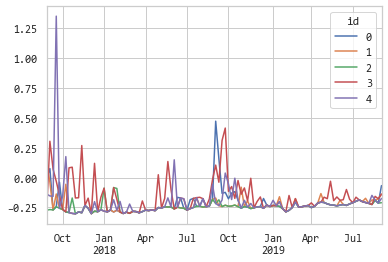

In [12]:
stand_t.iloc[:, 0:5].plot()
plt.show()

0    56397
2     1922
1      105
dtype: int64


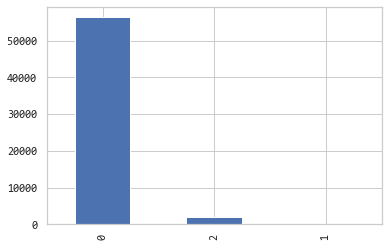

In [13]:
clusters = KMeans(n_clusters=3, random_state=0).fit_predict(stand)
print(pd.Series(clusters).value_counts())
pd.Series(clusters).value_counts().plot.bar()
plt.show()

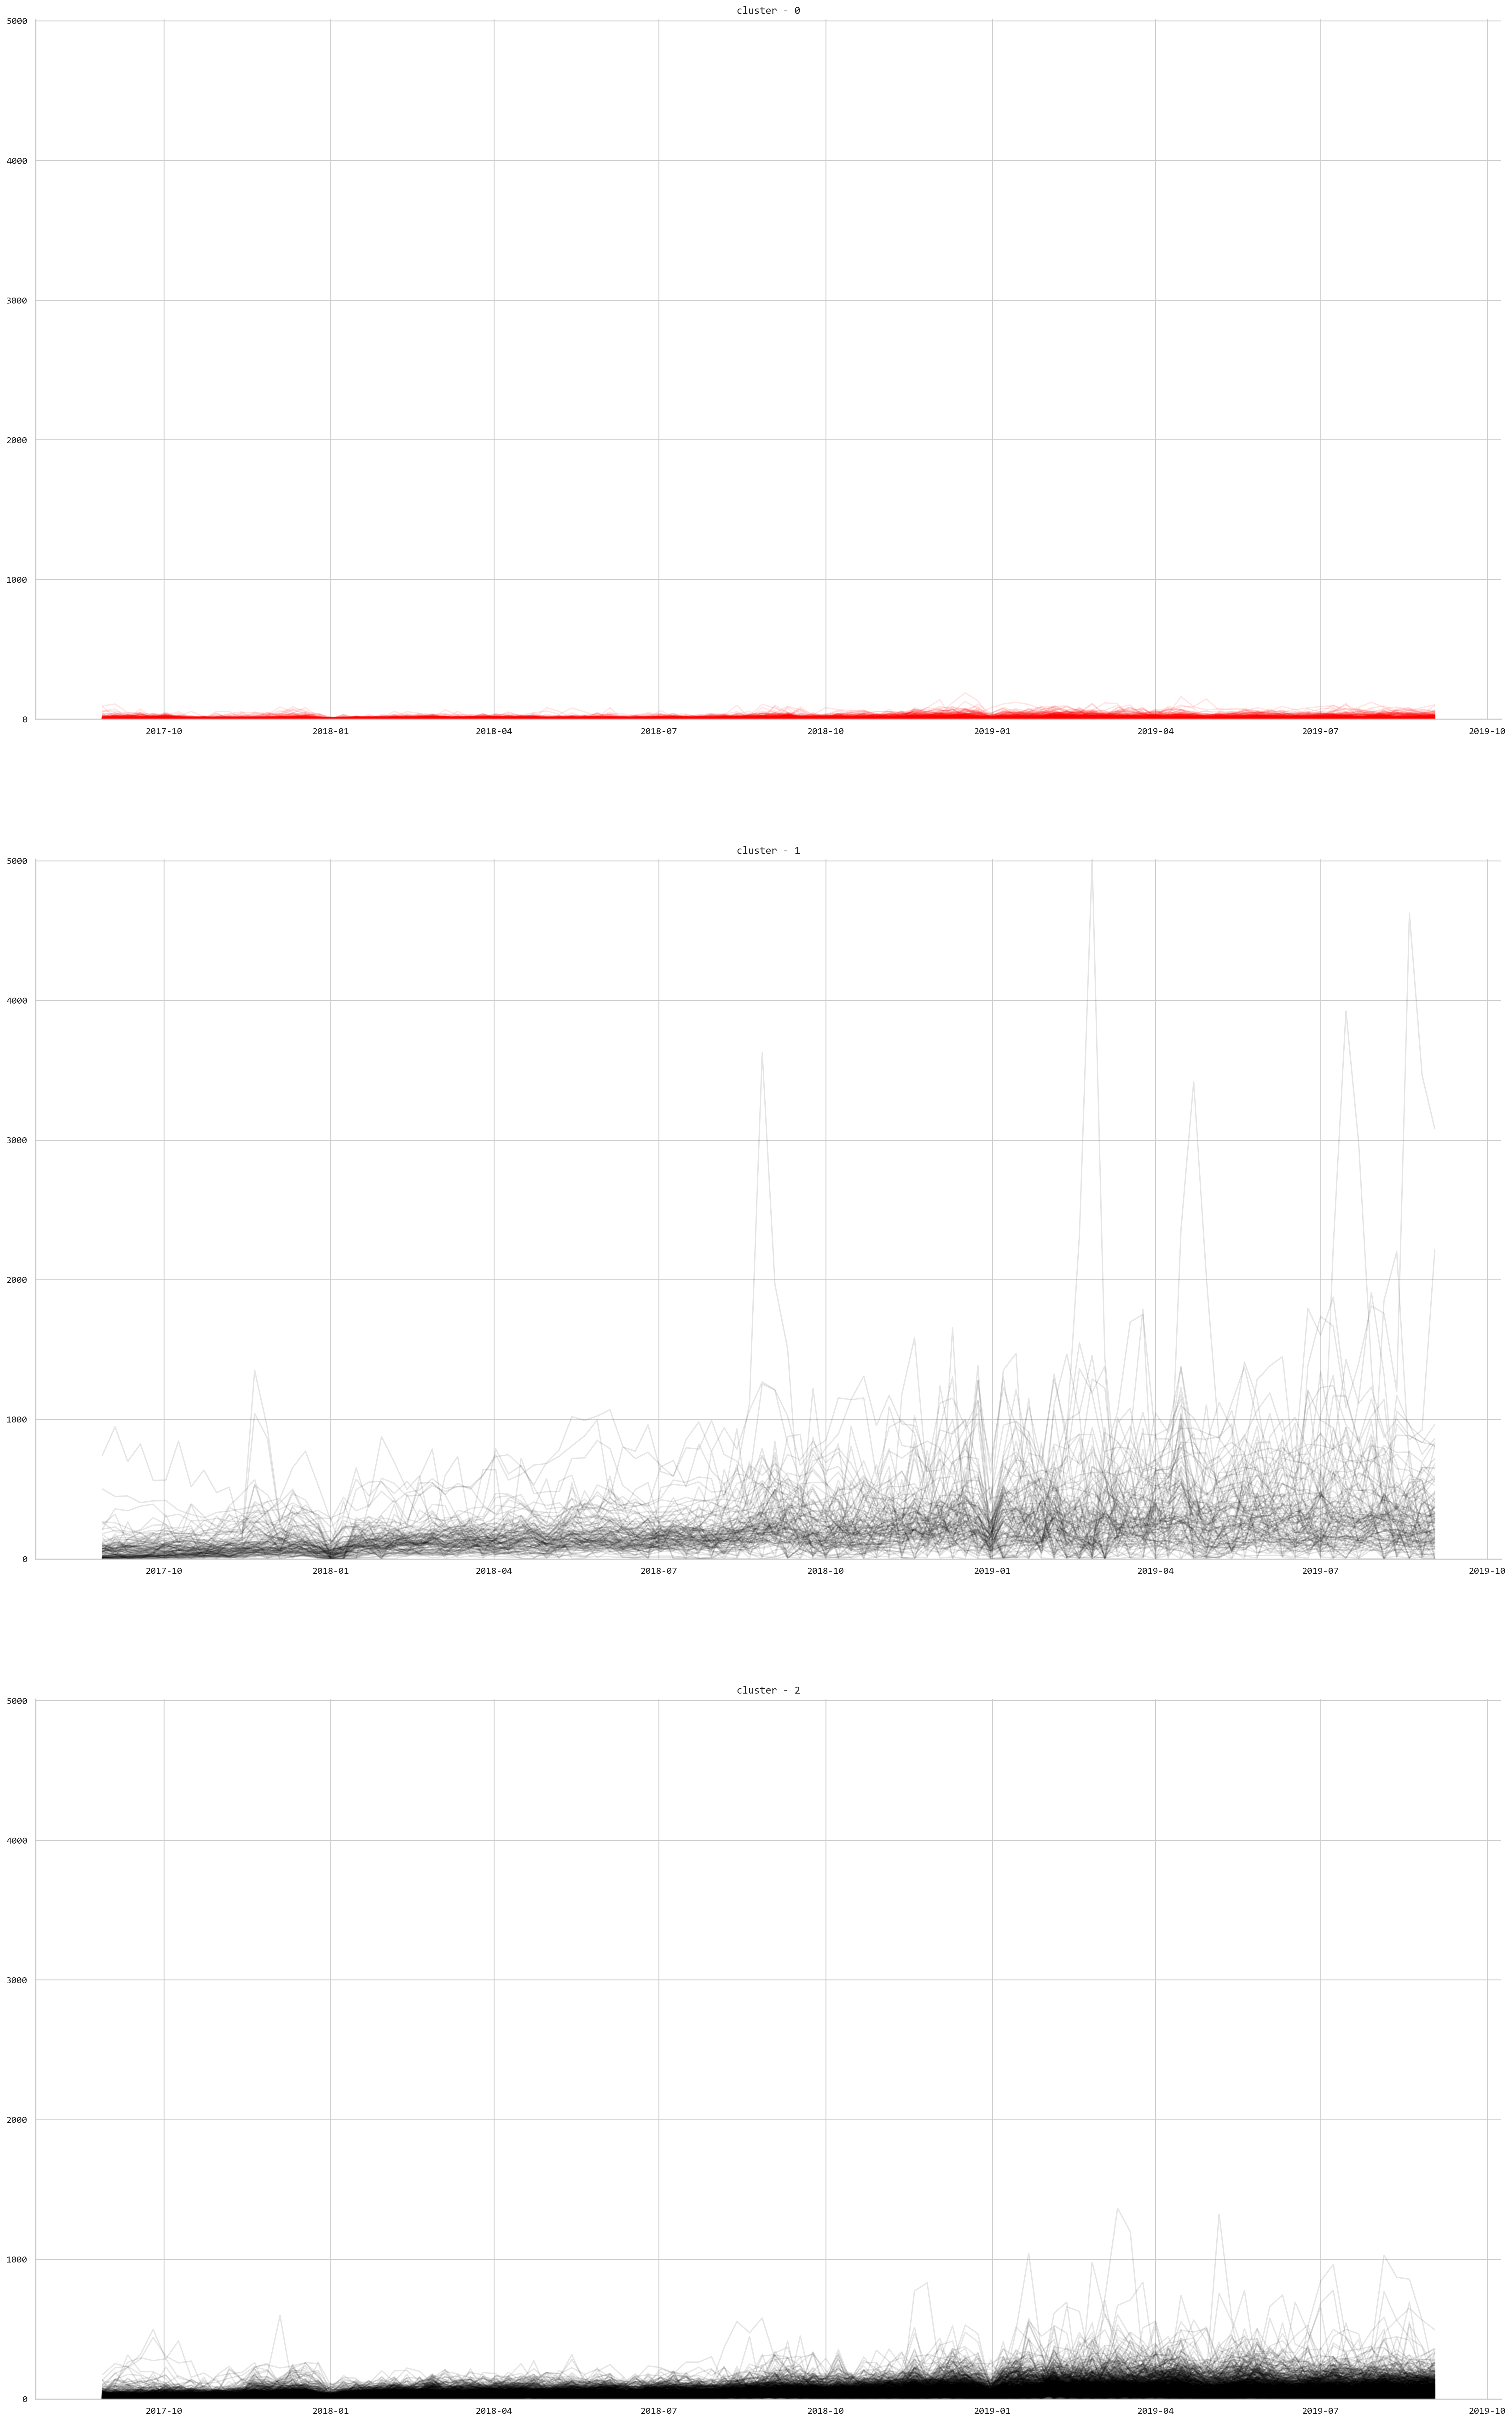

In [14]:
plt.figure(figsize=[30, 50], dpi=200)

max_y = np.max(df.max())

plt.subplot(3, 1, 1)
plt.title('cluster - 0')
plt.ylim([0, max_y])
inds = np.where(clusters == 0)[0][:1000]
for i in inds:
    plt.plot(df_t.iloc[:, i], c='red', alpha=0.1)
    
plt.subplot(3, 1, 2)
plt.title('cluster - 1')
plt.ylim([0, max_y])
inds = np.where(clusters == 1)[0][:1000]
for i in inds:
    plt.plot(df_t.iloc[:, i], c='black', alpha=0.1)
        
plt.subplot(3, 1, 3)
plt.title('cluster - 2')
plt.ylim([0, max_y])
inds = np.where(clusters == 2)[0][:1000]
for i in inds:
    plt.plot(df_t.iloc[:, i], c='black', alpha=0.1)


sns.despine()
plt.savefig("clust1.png", bbox_inches = 'tight', pad_inches = 0)
plt.show()